<a href="https://colab.research.google.com/github/tejas020/NLP---Stock-Sentimental-Analysis/blob/main/Copy_of_Sentimental_Analysis_on_Headlines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project Title :**
# **Stock Sentimental Analysis on News Headlines**

### **Introduction**

In the ever-changing world of finance, traders and investors find great value in being able to derive relevant insights from massive volumes of news data. An organised method for comprehending market mood and its possible influence on stock prices is provided by sentiment analysis of news items. We can find trends in news sentiment, spot events that move markets, and use sentiment analysis tools to help us make better decisions in the hectic world of stock trading. Here, we'll examine how to use sophisticated natural language processing algorithms to extract stock sentiment from news headlines and show how this knowledge may be used to obtain an advantage in the financial markets

Using NLP concepts, we will examine how to extract information about the stock market scenario from news headlines obtained from https://finviz.com/ in this notebook.

**WHY FINVIZ ?**

1. News Headlines are most of the time of same length and easier to parse through.
2. Compared to independent bloggers, the headlines from FINVIZ's list of reliable websites are typically more jargon-filled. The sentiment analysis will be enhanced by consistent textual patterns.


# **Setting Up Libraries**

In [ ]:
!pip install nltk

In [ ]:
!pip uninstall --yes gdown

Found existing installation: gdown 5.1.0
Uninstalling gdown-5.1.0:
  Successfully uninstalled gdown-5.1.0


In [ ]:
!pip install gdown -U --no-cache-dir


In [ ]:
import gdown

url = 'https://drive.google.com/drive/folders/16QFNDn3W9jwVtdPJ7NDprC-6Na3F23tL?usp=sharing'

gdown.download_folder(url)

Retrieving folder contents


Processing file 1mDlsKRLLAI0-D-7HyfwhHpHUdXZxqTU3 fb_05ene.html
Processing file 1LOthBOSzkIDfaOvNvNJGPO0aWX0ULMdq fb_22sep.html
Processing file 1qhxfqmrxt5p34Ko8e7kHNr-VqUbIxbxr tsla_05ene.html
Processing file 1u2U2JKANAK6ky7CuLDcgUMb_EwULP8CX tsla_22sep.html
Processing file 1r9q_Hgt7pynrW2OpuIDxbz7cIB8pa-Ct tsla_26nov.html


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1mDlsKRLLAI0-D-7HyfwhHpHUdXZxqTU3
To: /content/datasets/fb_05ene.html
100%|██████████| 152k/152k [00:00<00:00, 146MB/s]
Downloading...
From: https://drive.google.com/uc?id=1LOthBOSzkIDfaOvNvNJGPO0aWX0ULMdq
To: /content/datasets/fb_22sep.html
100%|██████████| 154k/154k [00:00<00:00, 117MB/s]
Downloading...
From: https://drive.google.com/uc?id=1qhxfqmrxt5p34Ko8e7kHNr-VqUbIxbxr
To: /content/datasets/tsla_05ene.html
100%|██████████| 121k/121k [00:00<00:00, 311MB/s]
Downloading...
From: https://drive.google.com/uc?id=1u2U2JKANAK6ky7CuLDcgUMb_EwULP8CX
To: /content/datasets/tsla_22sep.html
100%|██████████| 116k/116k [00:00<00:00, 325MB/s]
Downloading...
From: https://drive.google.com/uc?id=1r9q_Hgt7pynrW2OpuIDxbz7cIB8pa-Ct
To: /content/datasets/tsla_26nov.html
100%|██████████| 118k/118k [00:00<00:00, 277MB/s]
Download completed


['/content/datasets/fb_05ene.html',
 '/content/datasets/fb_22sep.html',
 '/content/datasets/tsla_05ene.html',
 '/content/datasets/tsla_22sep.html',
 '/content/datasets/tsla_26nov.html']

We'll be utilising a package called Beautiful Soup for web scraping.HTML files will be stored in a directory termed "datasets," and each file's HTML content will be parsed. Following that, we will use the filename as the key to store the news headlines in the dictionary html_table, retrieved from each file using the id attribute set to 'news-table'.

In [ ]:
from bs4 import BeautifulSoup
import os

html_tables = {}

for table in os.listdir('/content/datasets'):
    path = f'/content/datasets/{table}'
    file = open(path, 'r')
    html = BeautifulSoup(file)
    html_table = html.find(id='news-table')
    html_tables[table] = html_table

In [ ]:
file_tsla = html_tables['tsla_22sep.html']
tsla_tr = file_tsla.findAll('tr')
print("Data Exploration in tsla_22sep html file\n")
for i, row in enumerate(tsla_tr):
    link= row.a.get_text()
    data= row.td.get_text()
    print(f'File number {i+1}:')
    print(link)
    print(data)
    print("\n")

    if i == 3:
        break

file_fb = html_tables['fb_05ene.html']
fb_tr = file_fb.findAll('tr')
print("Data Exploration in fb_22sep fb file\n")
for i, row in enumerate(fb_tr):
    link= row.a.get_text()
    data= row.td.get_text()
    print(f'File number {i+1}:')
    print(link)
    print(data)
    print("\n")

    if i == 3:
        break

Data Exploration in tsla_22sep html file

File number 1:
Billionaire investor questions Elon Musk getting 'a pass' after bombshell tweets
Sep-21-18 09:56PM  


File number 2:
Broadcoms Stock Looks Like a Winner
09:30PM  


File number 3:
SHAREHOLDER ALERT:  Pomerantz Law Firm Reminds Shareholders with Losses on their Investment in Tesla, Inc. of Class Action Lawsuit and Upcoming Deadline  TSLA
05:30PM  


File number 4:
Tesla's People Problem and the Inscrutable Musk: 2 Things That Make You Go Hmmm
05:30PM  


Data Exploration in fb_22sep fb file

File number 1:
Facebook, Apple, Netflix, Amazon and Alphabet Power Friday Gains
Jan-04-19 06:22PM  


File number 2:
Earnings Reports for the Week of Jan. 7-11 (BBBY, KBH)
05:15PM  


File number 3:
COLUMN-Commentary: 2019 will be the year of more state control
04:55PM  


File number 4:
3 Tech Trends to Watch in 2019
04:53PM  




# Data Extraction and Headline Parsing

**Step 1** : To store the parsed news data, create an empty list called parsed_news and initialise it.

**Step 2** : Iterate over every key-value pair found in the dictionary html_tables.Each pair denotes a file name and the matching HTML table for it:

1. Extract the text content of the current table row to obtain the headline and extra information.
2. To extract the date and time information, split the text content of the first table data cell.
(Date and time should be stored together if they are both present, if not, store the one piece of information in the time variable)
3. Extract the ticker symbol by separating the file name at the first underscore ('_')
Append empty list created before with the ticker symbol, the time, date, and the headline text for further processing

In [ ]:
parsed_news = []
for file_name, news_table in html_tables.items():
    for x in news_table.findAll('tr'):
        text = x.get_text()
        date_scrape = x.td.text.split()

        if len(date_scrape) == 1:
            time = date_scrape[0]
        else:
            date = date_scrape[0]
            time = date_scrape[1]

        # Extract the ticker from the file name, get the string up to the 1st '_'
        ticker = file_name.split("_")[0]
        # Append ticker, date, time and headline as a list to the 'parsed_news' list
        parsed_news.append([ticker, date, time, x.a.text])

# Text Sentiment Analysis Using NLTK's VADER Lexicon: A Rule-Based Method

One popular tool for analysing sentiments expressed in text is the Valence Aware Dictionary and Sentiment Reasoner, which is a rule-based lexicon. Along with rules for managing negations, capitalization, punctuation, and emoticons, the VADER lexicon includes pre-trained sentiment scores assigned to words and phrases. By providing words and phrases with matching sentiment ratings, this dataset enables the sentiment analyzer to accurately identify text based on the overall sentiment expressed.

NLTK's sentiment analysis toolset includes SentimentIntensityAnalyzer, which is designed for VADER lexicon-based sentiment analysis. This class provides a simple interface for evaluating the degree of sentiment in textual data. SentimentIntensityAnalyzer offers useful insights into the overall sentiment communicated in the text by computing sentiment scores, including compound, positive, negative, and neutral scores, by utilising pre-trained sentiment scores from the VADER vocabulary. It is a flexible and popular tool for Python sentiment analysis jobs because of its rule-based methodology, which effectively interprets sentiment nuances.

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

words = {
    'crushes': 10,
    'beats': 5,
    'misses': -5,
    'trouble': -10,
    'falls': -100,
    'thrives': 9,
    'excels': 8,
    'struggles': -8,
    'challenges': -7,
    'declines': -9,
}

vader = SentimentIntensityAnalyzer()

#To see existing lexicons present
lexicon = vader.lexicon
print(lexicon)

vader.lexicon.update(words)


{'$:': -1.5, '%)': -0.4, '%-)': -1.5, '&-:': -0.4, '&:': -0.7, "( '}{' )": 1.6, '(%': -0.9, "('-:": 2.2, "(':": 2.3, '((-:': 2.1, '(*': 1.1, '(-%': -0.7, '(-*': 1.3, '(-:': 1.6, '(-:0': 2.8, '(-:<': -0.4, '(-:o': 1.5, '(-:O': 1.5, '(-:{': -0.1, '(-:|>*': 1.9, '(-;': 1.3, '(-;|': 2.1, '(8': 2.6, '(:': 2.2, '(:0': 2.4, '(:<': -0.2, '(:o': 2.5, '(:O': 2.5, '(;': 1.1, '(;<': 0.3, '(=': 2.2, '(?:': 2.1, '(^:': 1.5, '(^;': 1.5, '(^;0': 2.0, '(^;o': 1.9, '(o:': 1.6, ")':": -2.0, ")-':": -2.1, ')-:': -2.1, ')-:<': -2.2, ')-:{': -2.1, '):': -1.8, '):<': -1.9, '):{': -2.3, ');<': -2.6, '*)': 0.6, '*-)': 0.3, '*-:': 2.1, '*-;': 2.4, '*:': 1.9, '*<|:-)': 1.6, '*\\0/*': 2.3, '*^:': 1.6, ',-:': 1.2, "---'-;-{@": 2.3, '--<--<@': 2.2, '.-:': -1.2, '..###-:': -1.7, '..###:': -1.9, '/-:': -1.3, '/:': -1.3, '/:<': -1.4, '/=': -0.9, '/^:': -1.0, '/o:': -1.4, '0-8': 0.1, '0-|': -1.2, '0:)': 1.9, '0:-)': 1.4, '0:-3': 1.5, '0:03': 1.9, '0;^)': 1.6, '0_o': -0.3, '10q': 2.1, '1337': 2.1, '143': 3.2, '1432': 2.

# Visualizing VADER Lexicon and Scores

Users can obtain a thorough understanding of the VADER tool's sentiment analysis capabilities by plotting the lexicon and scores. This helps users make well-informed decisions when performing sentiment analysis activities.

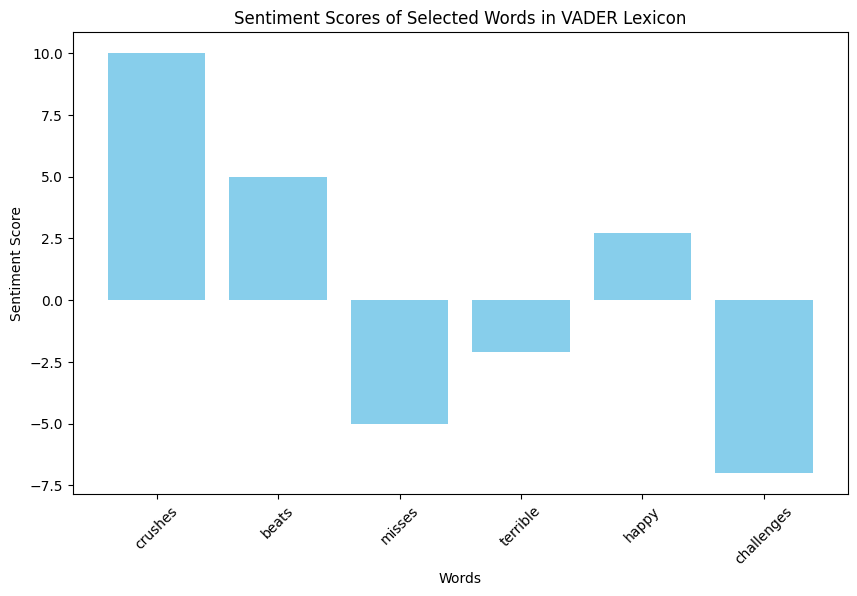

In [ ]:
import matplotlib.pyplot as plt

words = ['crushes', 'beats', 'misses', 'terrible', 'happy', 'challenges']
scores = [lexicon[word] for word in words]

plt.figure(figsize=(10, 6))
plt.bar(words,scores, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Scores of Selected Words in VADER Lexicon')
plt.xticks(rotation=45)
plt.show()


Using the Vader Sentiment Intensity Analyzer to calculate the sentiment scores for each News Headline

In [ ]:
import pandas as pd

col = ['ticker', 'date', 'time', 'headline']
scored_news = pd.DataFrame(parsed_news, columns=col)
scores = [vader.polarity_scores(head) for head in scored_news.headline]
scores_df = pd.DataFrame(scores)
scored_news = scored_news.join(scores_df)
scored_news['date'] = pd.to_datetime(scored_news.date).dt.date
print(scored_news)

    ticker        date     time  \
0       fb  2018-09-22  11:08AM   
1       fb  2018-09-22  12:02AM   
2       fb  2018-09-21  06:21PM   
3       fb  2018-09-21  06:18PM   
4       fb  2018-09-21  06:17PM   
..     ...         ...      ...   
495     fb  2018-12-28  02:57PM   
496     fb  2018-12-28  02:44PM   
497     fb  2018-12-28  01:46PM   
498     fb  2018-12-28  01:30PM   
499     fb  2018-12-28  11:35AM   

                                              headline    neg    neu    pos  \
0    How former Facebook and Google engineer Bret T...  0.000  0.798  0.202   
1    White House Drafts Order To Look Into Google, ...  0.000  1.000  0.000   
2    Facebook Withdraws Direct Promotion of Politic...  0.000  1.000  0.000   
3    Facebook's Plan to Pull Back Campaign Support ...  0.000  0.787  0.213   
4    Facebook's Plan to Pull Back Campaign Support ...  0.000  0.787  0.213   
..                                                 ...    ...    ...    ...   
495  Accidental Instagram 

<ipython-input-11-5b0cd0a4f346>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  scored_news['date'] = pd.to_datetime(scored_news.date).dt.date


In [ ]:
num_news_before = scored_news.headline.count()

# Remove duplicates based on the headline and ticker
scored_news_clean = scored_news.drop_duplicates(subset=['headline', 'ticker'])

# Count number of headlines after dropping duplicates
num_news_after = scored_news_clean.headline.count()

# Print before and after numbers to assess the impact of duplicate removal
print(f"Before we had : {num_news_before} headlines\nAfter we have : {num_news_after} headlines")


Before we had : 500 headlines
After we have : 476 headlines


# Filtering and Organizing Facebook Stock News for January 3, 2019

We will now filter stock news items based on the dates '2019-01-03' and Facebook (ticker symbol: 'fb'). It checks if Facebook has any headlines available on that day. If so, it organises these headlines according to when they were released. It makes it simpler to comprehend what news was available on Facebook on that particular day and time.

In [ ]:
day1= scored_news_clean.set_index(['ticker', 'date'])
day1= day1.xs('fb')
print(day1.index.get_level_values('date').unique())

# Check if the date '2019-01-03' exists in the index
if ('fb', '2019-01-03') in day1.index:
    day1 = day1.loc[('fb', '2019-01-03')]

    # Convert the datetime string to just the time
    day1['time'] = pd.to_datetime(day1['time']).dt.time

day1= day1.set_index('time')
day1 = day1.sort_index().head(10)

Index([2018-09-22, 2018-09-21, 2018-09-20, 2018-09-19, 2018-09-18, 2019-01-04,
       2019-01-03, 2019-01-02, 2019-01-01, 2018-12-31, 2018-12-30, 2018-12-29,
       2018-12-28],
      dtype='object', name='date')


In [ ]:
day2= scored_news_clean.set_index(['ticker', 'date'])
day2= day2.xs('tsla')
print(day2.index.get_level_values('date').unique())

# Check if the date '2018-11-26' exists in the index
if ('tsla', '2018-11-26') in day1.index:
    day2 = day2.loc[('tsla', '2018-11-26')]

    # Convert the datetime string to just the time
    day2['time'] = pd.to_datetime(day2['time']).dt.time

day2= day2.set_index('time').head(30)

Index([2018-11-26, 2018-11-25, 2018-11-23, 2018-11-22, 2018-11-21, 2018-11-20,
       2018-11-19, 2018-11-18, 2018-11-17, 2018-11-16, 2018-09-21, 2018-09-20,
       2018-09-19, 2018-09-18, 2019-01-04, 2019-01-03, 2019-01-02],
      dtype='object', name='date')


<Figure size 1500x600 with 0 Axes>

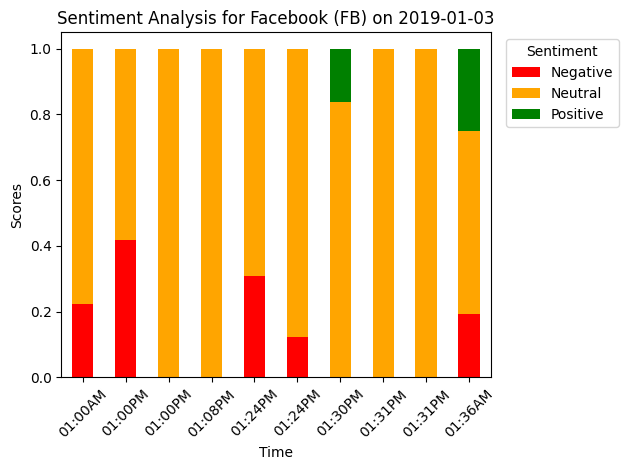

In [ ]:
import matplotlib.pyplot as plt

# Set title and colors
title = "Sentiment Analysis for Facebook (FB) on 2019-01-03"
colors = ["red", "orange", "green"]

# Drop the columns that aren't useful for the plot
plot_day =day1.drop(['compound', 'headline'], axis=1)

# Change the column names
plot_day.columns = ['Negative', 'Neutral', 'Positive']

# Plot a stacked bar chart
plt.figure(figsize=(15, 6))
plot_day.plot.bar(stacked=True, color=colors, title=title)

# Customize labels and legend
plt.xlabel('Time')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.legend(title='Sentiment', loc='upper left', bbox_to_anchor=(1.02, 1))

# Show the plot
plt.tight_layout()
plt.show()



<Figure size 1500x600 with 0 Axes>

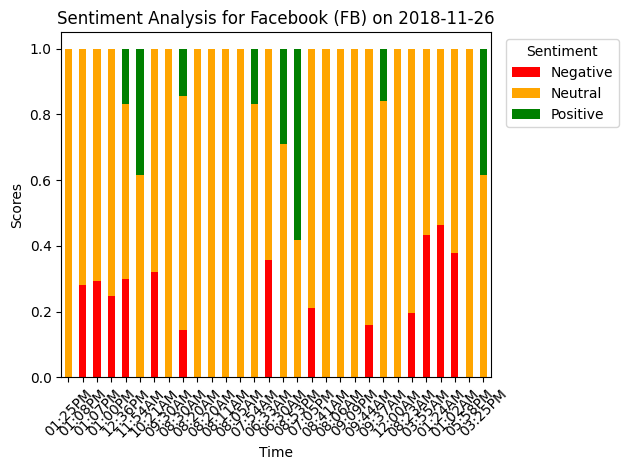

In [ ]:
import matplotlib.pyplot as plt

# Set title and colors
title = "Sentiment Analysis for Facebook (FB) on 2018-11-26"
colors = ["red", "orange", "green"]

# Drop the columns that aren't useful for the plot
plot_day =day2.drop(['compound', 'headline'], axis=1)

# Change the column names
plot_day.columns = ['Negative', 'Neutral', 'Positive']

# Plot a stacked bar chart
plt.figure(figsize=(15, 6))
plot_day.plot.bar(stacked=True, color=colors, title=title)

# Customize labels and legend
plt.xlabel('Time')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.legend(title='Sentiment', loc='upper left', bbox_to_anchor=(1.02, 1))

# Show the plot
plt.tight_layout()
plt.show()



# Conclusion

To summarise, sentiment analysis of news headlines provides investors with important information about investor sentiment and helps with risk management, trading signal identification, sentiment analysis, and market sentiment analysis. Investing decisions can be made with greater knowledge, investment strategies can be modified accordingly, and portfolio performance can be improved by utilising sentiment analysis.